# Project: Multi-Objective Optimization

**Deadline**: <u>November 4, 2025 at 10:00 p.m.</u> (SGT)

## Guidelines for Submission

### A. Submission Package
1. Submit **one ZIP file per group** named **`EC_Group_<xy>.zip`**, where `<xy>` is your group number.  
   *Example:* `EC_Group_22.zip`
2. The ZIP must contain the following files:
   - **`CEG5302_Group_Project_<xy>.ipynb`** — your main Jupyter Notebook  
   - **`report_<xy>.pdf`** — your 2–3 page report  
   *Example:* `CEG5302_Group_Project_22.ipynb` and `report_22.pdf`

### B. General Requirements
1. Each group has **four members** and submits **only one** ZIP.  
2. The Jupyter Notebook must clearly display **Python 3 code** and its **generated results**.
3. The notebook must be **fully executable top-to-bottom** to reproduce all figures directly from code.  
   Do **not** insert external image files; all plots/images must be produced during execution.  
   <span style="color:red;">Files with the `.py` extension are not accepted.</span>
4. Before submitting, **rerun the entire notebook** to confirm it executes without errors.  
   Code that cannot be executed or produces errors will result in **point deductions**.

### C. File-Naming Examples
- Group 07 → `EC_Group_07.zip` → contains `CEG5302_Group_Project_07.ipynb`, `report_07.pdf`  


In [1]:
import numpy as np

## Part 1. Continuous Multi-Objective Optimization
In this part, we have implemented the two-objective ZDT3 problem [1] and the vehicle crashworthiness design problem [2], and provided examples on how to use them. <u>**Your task is to implement <span style="color:blue;">NSGA-II</span> and use it to solve these two problems**</u>.

[1] Zitzler, E., Deb, K., & Thiele, L. (2000). Comparison of multiobjective evolutionary algorithms: Empirical results. Evolutionary computation, 8(2), 173-195.

[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using a stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

### Introduction to a Two-Objective Test Problem: ZDT3 
The ZDT test suite [1] is a well-known set of benchmark problems in multi-objective optimization. It was introduced by Zitzler, Deb, and Thiele in 2000 to evaluate the performance of multi-objective optimization algorithms. ZDT3 is one of the test problems in the ZDT test suite.

- Number of objectives: 2
- Number of decision variables: 30

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=\mathbf{x} \\
f_2(\mathbf{x})=g(\mathbf{x}) h(\mathbf{x})
\end{array}\:,\right. \\
&\mathrm{where} \enspace g(\mathbf{x})=1+\frac{9}{n-1} \sum_{i=2}^n x_i, \\
& \qquad \enspace h(\mathbf{x})=1-\sqrt{f_1(\mathbf{x}) / g(\mathbf{x})}-\left(f_1(\mathbf{x}) / g(\mathbf{x})\right) \sin \left(10 \pi f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$

[1] E. Zitzler, K. Deb, and L. Thiele, Comparison of multiobjective evolutionary algorithms: Empirical results, Evolutionary computation, 2000, 8(2): 173-195.

In [ ]:
class ZDT3():

    def __init__(self):
        self.name = 'ZDT3'
        self.n_obj = 2  # number of objectives
        self.n_var = 30  # number of decision variables

        self.lower = np.zeros(self.n_var)  # lower bound of decision variables
        self.upper = np.ones(self.n_var)  # upper bound of decision variables

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj)) # for each chromosom, we have 2 objective function evals.
        f[:, 0] = x[:, 0]
        g = 1.0 + 9.0 * np.sum(x[:, 1:], axis=1) / (self.n_var - 1)
        h = 1 - np.power(
            f[:, 0] * 1.0 / g,
            0.5) - (f[:, 0] * 1.0 / g) * np.sin(10 * np.pi * f[:, 0])
        f[:, 1] = g * h

        return f

In [ ]:
# Create an instance of ZDT3
prob = ZDT3()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = ZDT3
Number of objectives = 2
Number of variables = 30
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)

print(f"x: {x}")

f = prob.evaluate(x)
print(f"f(x) = {f}")


x: [[0.93693676 0.16532061 0.10205129 0.55404163 0.9797038  0.65638449
  0.44868288 0.38543203 0.27516358 0.92409187 0.38231994 0.65521084
  0.31697582 0.20447672 0.36916805 0.25436992 0.69788373 0.81432438
  0.07117927 0.62468147 0.79340788 0.30260543 0.32146685 0.26335243
  0.84109783 0.09368195 0.81464588 0.05356775 0.39894592 0.93481267]]
f(x) = [[0.93693676 3.89240035]]


In [ ]:
# Initialize a population with 5 solutions and evaluate them
pop_size = 5
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)


f = prob.evaluate(x)
print(f"f(x) = {f}")

f(x) = [[0.8467528  2.48249452]
 [0.81146353 3.09112858]
 [0.17455803 5.12403614]
 [0.23371943 3.05386776]
 [0.94508946 4.15185793]]


### TODO: Implement NSGA-II and Solve ZDT3 (30 marks)

Your task is **to implement NSGA-II, use it to solve ZDT3, obtain the final population, and visualize the final population.** 

To help you get started, we have provided skeleton code for NSGA-II, which serves as a starting point for you to add your own implementation. Please note that you **should not modify the framework** we have given you. More precisely, edit the "TODO" parts and do not introduce other functions.  Additionally, we have also provided you with code to create instances of the NSGA2() and ZDT3() classes.

An example of the expected output is shown in the following figure, which displays the true Pareto front of ZDT3 (represented by red lines) and the final population obtained by NSGA-II (represented by grey circles). Your final solutions should be similar to these grey circles.

<img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_ZDT3.png?raw=true" alt="ZDT3" width="40%">

It is crucial to ensure that your code runs successfully, as failing to do so may result in a zero mark for this task. If you face difficulties in implementing NSGA-II in this part, you can refer to available source codes online, such as [PlatEMO](https://github.com/BIMK/PlatEMO/blob/master/PlatEMO/Algorithms/Multi-objective%20optimization/NSGA-II/NSGAII.m) and [pymoo](https://github.com/anyoptimization/pymoo/blob/main/pymoo/algorithms/moo/nsga2.py), or seek assistance from ChatGPT.

In [ ]:
class NSGA2():
    def __init__(self, pop_size=100, ):
        self.pop_size = pop_size
        #-----------BEGIN-----------#
        # TODO: Include other parameters you may use to create an 
        #       instance of NSGA2(), such as crossover probability 
        #       and mutation probability  
        #-----------END-----------#
        
    def initialize(self, prob):
        x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
            self.pop_size, prob.n_var)
        return x
    
    def fitness_assignment(self, ):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance
        # to assign non-domination rank and local crowding distance to each 
        # solution in the parent population, which will be used later in
        # tournament selection
        #-----------END-----------#
    
    def tournament_selection(self, ):
        #-----------BEGIN-----------#
        # TODO: Implement tournament selection on parent population to  
        # construct a mating pool of size `pop_size` for crossover
        #-----------END-----------#
        
    def crossover(self, pc):
        #-----------BEGIN-----------#
        # TODO: Implement simulated binary crossover (SBX) to generate 
        #       offspring of size `pop_size`
        #-----------END-----------#
        
    def mutation(self, pm):
        #-----------BEGIN-----------#
        # TODO: Implement polynomial mutation (PM)
        #-----------END-----------#
        
        
    def environmental_selection(self, ):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance on
        # the combined population of parent population and offspring population
        # to select `pop_size` solutions for next population from combined population
        # of 2 * `pop_size` solutions
        #-----------END-----------#

        
    def run(self, prob, max_gen=500):
        # Initialization
        population_x = self.initialize(prob)
        population_fx = prob.evaluate(population_x)
                
        # Evolve until termination condition is met
        for i in range(1, max_gen):
            #-----------BEGIN-----------#
            # TODO:
            # fitness assignment of parent population
            # ?? = self.tournament_selection(?)
            # ??? = self.crossover(??)
            # offspring_x = self.mutation(???)
            # offspring_fx = prob.evaluate(offspring_x)           
            # Apply enviromental selection to select solutions
            [population_x, population_fx]  = environmental_selection([population_x, offspring_x])
       
        return population_x, population_fx

In [ ]:
# Instantiate class NSGA2() and class ZDT3()
optimizer = NSGA2(pop_size=100, ??)
problem = ZDT3()

# Use NSGA-II to solve the ZDT3 problem
[optimum_x, optimum_fx] = optimizer.run(problem, max_gen=500)

#-----------BEGIN-----------#
# TODO: Plot the final population `optimum_fx` in the objective space
#-----------END-----------#

### TODO: Use NSGA-II to Solve a Real-World Problem: Crashworthiness Design of Vehicles (10 marks)

The automotive industry places great importance on structural optimization for crashworthiness. In a study by Liao et al. [2], the crashworthiness design of vehicles was modeled as a multi-objective optimization problem. The problem aims to minimize three objectives: weight ($f_1$), acceleration characteristics ($f_2$), and toe-board intrusion ($f_3$) of the vehicle design. The decision variables for the problem specify the thickness of five reinforced members around the frontal structure of the vehicle, respectively. You are required to use NSGA-II to optimize the following crashworthiness design problem.

- Number of objectives: 3
- Number of decision variables: 5

$$
\begin{aligned}
&\mathrm{minimize} \left\{\begin{aligned}
f_1(\mathbf{x})= \,& 1640.2823+2.3573285 x_1+2.3220035 x_2 \\
& +4.5688768 x_3+7.7213633 x_4 +4.4559504 x_5\\
f_2(\mathbf{x})= \,& 6.5856+1.15 x_1-1.0427 x_2+0.9738 x_3 \\
& +0.8364 x_4-0.3695 x_1 x_4+0.0861 x_1 x_5 \\
& +0.3628 x_2 x_4-0.1106 x_1^2-0.3437 x_3^2 \\
& +0.1764 x_4^2\\
f_3(\mathbf{x})= & -0.0551+0.0181 x_1+0.1024 x_2 \\
& +0.0421 x_3-0.0073 x_1 x_2+0.024 x_2 x_3 \\
& -0.0118 x_2 x_4-0.0204 x_3 x_4-0.008 x_3 x_5 \\
& -0.0241 x_2^2+0.0109 x_4^2\\
\end{aligned}\right., \\
& \mathrm{where} \enspace  1 \leq x_i \leq 3, \enspace i=1,\ldots,5.
\end{aligned}
$$


[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

Your task is to **instantiate the NSGA2() and CrashworthinessDesign() classes, use NSGA-II to solve the problem, obtain the final population, and visualize the final population**. 

You can refer to the example figures below for reference. The left figure displays the Pareto front approximated by combining solutions obtained by several state-of-the-art algorithms, and the right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_crash.png?raw=true" alt="PF of crash" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_crash.png?raw=true" alt="NSGA2 on crash" style="width: 40%;">
</div>

Note that while NSGA-II provides solutions that are in close proximity to the Pareto front, indicating good convergence, these solutions are not evenly distributed across the Pareto front. **What are the reasons behind the poor distribution of solutions obtained by NSGA-II? Do you have any suggestions for improving NSGA-II performance on this problem? Please share your thoughts and suggestions.**


In [7]:
class CrashworthinessDesign():

    def __init__(self):
        self.name = 'Crashworthiness design of vehicles'
        self.n_obj = 3
        self.n_var = 5

        self.lower = np.full(self.n_var, 1.0)
        self.upper = np.full(self.n_var, 3.0)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))

        x1 = x[:, 0]
        x2 = x[:, 1]
        x3 = x[:, 2]
        x4 = x[:, 3]
        x5 = x[:, 4]

        f[:, 0] = 1640.2823 + (2.3573285 * x1) + (2.3220035 * x2) + (
            4.5688768 * x3) + (7.7213633 * x4) + (4.4559504 * x5)
        f[:, 1] = 6.5856 + (1.15 * x1) - (1.0427 * x2) + (0.9738 * x3) + (
            0.8364 * x4) - (0.3695 * x1 * x4) + (0.0861 * x1 * x5) + (
                0.3628 * x2 * x4) - (0.1106 * x1 * x1) - (0.3437 * x3 * x3) + (
                    0.1764 * x4 * x4)
        f[:, 2] = -0.0551 + (0.0181 * x1) + (0.1024 * x2) + (0.0421 * x3) - (
            0.0073 * x1 * x2) + (0.024 * x2 * x3) - (0.0118 * x2 * x4) - (
                0.0204 * x3 * x4) - (0.008 * x3 * x5) - (0.0241 * x2 * x2) + (
                    0.0109 * x4 * x4)

        return f

In [8]:
# Create an instance of the crashworthiness design problem
prob = CrashworthinessDesign()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

NameError: name 'np' is not defined

In [ ]:
# Initialize a population with 5 solutions and evaluate them
pop_size = 5
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f = prob.evaluate(x)
print(f"f(x) = {f}")

x =  [[2.25422765 2.56591786 1.43218949 2.79277976 1.03629398]
 [1.08607599 1.90339721 1.14015131 2.89243717 1.29014279]
 [2.99795364 2.47744079 2.00169486 1.22050017 1.6507178 ]
 [1.44277262 1.33794799 1.1318415  1.60075864 2.34207138]
 [1.55501507 2.89001119 1.21475104 2.92456522 2.47135307]]
f(x) = [[1.68427956e+03 1.08166384e+01 1.03034075e-01]
 [1.68055381e+03 1.12352475e+01 1.04330876e-01]
 [1.67902703e+03 8.48278395e+00 1.58288892e-01]
 [1.67475755e+03 9.28684517e+00 7.92721317e-02]
 [1.68980250e+03 1.14405235e+01 6.72905786e-02]]


In [ ]:
#-----------BEGIN-----------#
# TODO: 
#   1. Instantiate class NSGA2() and class CrashworthinessDesign()
#   2. Use NSGA-II to solve the crashworthiness design problem
#   3. Plot the final population `optimum_fx` in the objective space
#   4. Share your thoughts on the questions above.
#-----------END-----------#

## Part 2. Constrained Multi-Objective Optimization

In this part, your task is to implement the parameter-less constraint handling technique in NSGA-II and use the constrained NSGA-II to solve constrained optimization problems.

### Introduction to a Constrained Optimization Problem: MW7

The MW test suite [3] is a constrained multi-objective optimization test suite proposed by Zhongwei Ma and Yong Wang. It is designed to evaluate the performance of constrained multi-objective optimization algorithms. MW7 is one of the test problems in the MW test suite. We have implemented the MW7() class and provided examples on how to use it below.

- Number of objectives: 2
- Number of decision variables: 15
- Number of constraints: 2

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=g_3(\mathbf{x}) x_1 \\
f_2(\mathbf{x})=g_3(\mathbf{x}) \sqrt{1-\left(f_1(\mathbf{x}) / g_3(\mathbf{x})\right)^2}
\end{array}\:,\right. \\
&\mathrm{subject~to} \enspace c_1(\mathbf{x})=\left(1.2+0.4 \sin (4 l)^{16}\right)^2-(f_1(\mathbf{x}))^2-(f_2(\mathbf{x}))^2 \geq 0,\\
& \qquad \qquad c_2(\mathbf{x})=(f_1(\mathbf{x}))^2 + (f_2(\mathbf{x}))^2 - \left(1.15 - 0.2 \sin (4 l)^8\right)^2 \geq 0,\\
&\mathrm{where} \enspace g_3(\mathbf{x})=1+\sum_{i=m}^n 2\left(x_i+\left(x_{i-1}-0.5\right)^2-1\right)^2, \\
& \qquad \enspace l=\arctan \left(f_2(\mathbf{x}) / f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$


[3] Ma, Z., & Wang, Y. (2019). Evolutionary constrained multiobjective optimization: Test suite construction and performance comparisons. IEEE Transactions on Evolutionary Computation, 23(6), 972-986.

In [1]:
import numpy as np

In [2]:
class MW7():

    def __init__(self):
        self.name = 'MW7'
        self.n_obj = 2  # number of objectives
        self.n_var = 15  # number of decision variables
        self.n_con = 2  # number of constraints

        self.lower = np.zeros(self.n_var)
        self.upper = np.ones(self.n_var)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))
        c = np.zeros((pop_size, self.n_con))

        g3 = 1 + 2.0 * np.sum((x[:, self.n_obj - 1:] +
                               (x[:, self.n_obj - 2:-1] - 0.5)**2 - 1.0)**2,
                              axis=1)

        f[:, 0] = g3 * x[:, 0]
        f[:, 1] = g3 * (1 - (f[:, 0] / g3)**2)**0.5

        with np.errstate(divide='ignore'):
            l = np.arctan(f[:, 1] / f[:, 0])

        c[:, 0] = (1.2 + 0.4 * (np.sin(4 * l))**16)**2 - f[:, 0]**2 - f[:, 1]**2
        c[:, 1] = f[:, 0]**2 + f[:, 1]**2 - (1.15 - 0.2 * (np.sin(4 * l))**8)**2
        c = np.where(c < 0, -c, 0)  # the degree of constraint violation of x at each constraint

        return f, c

In [3]:
# Create an instance of MW7
prob = MW7()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Number of constraints = {prob.n_con}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = MW7
Number of objectives = 2
Number of variables = 15
Number of constraints = 2
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")  # Constraint Violation

x =  [[9.32561125e-04 2.76597105e-01 4.53614859e-02 3.42934036e-01
  4.86777566e-01 4.49174876e-01 2.34719831e-01 8.60019661e-01
  9.93753276e-01 6.73775158e-01 8.12272913e-01 8.61529209e-01
  1.20341541e-01 5.62439653e-01 9.21318996e-01]]
f(x) = [[6.66956923e-03 7.15188115e+00]]
c(x) = [[49.7094485  0.       ]]
CV(x) = [[49.7094485]]


In [5]:
# Initialize a population with 2 solution and evaluate them
pop_size = 2
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")

x =  [[4.14639863e-01 9.54519084e-01 4.49860993e-01 4.36172459e-01
  8.88200064e-01 7.75550282e-02 4.31585336e-01 5.53083388e-01
  5.19420831e-01 9.19881938e-01 7.47450666e-01 7.14088652e-02
  3.49940618e-02 7.49832707e-01 5.28826662e-01]
 [6.45734127e-01 5.29739332e-01 3.98979221e-01 4.73726877e-05
  3.52386263e-01 5.67519780e-01 4.33434973e-01 1.97476505e-01
  6.67623664e-01 3.56764772e-01 4.89733431e-01 4.54910169e-01
  7.02609179e-02 2.64588817e-01 3.69907554e-01]]
f(x) = [[3.0358452  6.66259   ]
 [7.4756065  8.83969315]]
c(x) = [[ 51.22795106   0.        ]
 [132.58486751   0.        ]]
CV(x) = [[ 51.22795106]
 [132.58486751]]


### TODO: Implement Constrained NSGA-II and Solve MW7 (30 marks)
Your task is to **implement the parameter-less constraint handling technique in NSGA-II and use the constrained NSGA-II to solve the MW7 problem**.

You can refer to the example figures below for reference. The left figure (from [3]) displays the true Pareto front (represented by red points), the unconstrained Pareto front (represented by the blue line), and the feasible region (represented by the gray region). The right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the gray circles in the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_MW7.png?raw=true" alt="PF of MW7" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7.png?raw=true" alt="NSGA2 on MW7" style="width: 40%;">
</div>

Note that sometimes the solutions obtained by NSGA-II may not cover all segments of the Pareto front (as shown below). **What are the possible reasons? Please share your thoughts in your report.**

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_2.png?raw=true" alt="NSGA2 on MW7 2" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_3.png?raw=true" alt="NSGA2 on MW7 3" style="width: 40%;">
</div>

In [11]:
class CNSGA2():
    #-----------BEGIN-----------#
    # TODO: Implement the parameter-less constraint handling technique in NSGA-II
    def __init__(self,
                 pop_size=160,
                 pc=0.9,
                 pm=None,
                 eta_c=20,
                 eta_m=20,
                 seed=None,
                 # logging
                 verbose=True,
                 log_every=25,
                 alert_patience=75):
        self.pop_size = pop_size
        self.pc = pc
        self.pm = pm              # if None -> set to 1/n_var in run()
        self.eta_c = eta_c
        self.eta_m = eta_m
        self.verbose = verbose
        self.log_every = max(1, int(log_every))
        self.alert_patience = max(1, int(alert_patience))
        if seed is not None:
            np.random.seed(seed)

    def initialize(self, prob):
        return prob.lower + (prob.upper - prob.lower) * np.random.rand(self.pop_size, prob.n_var)

    # --------- helpers ---------
    @staticmethod
    def _pareto_dominates(F, i, j):
        """standard Pareto dominance for minimization (feasible-vs-feasible only)"""
        not_worse = np.all(F[i] <= F[j])
        strictly_better = np.any(F[i] < F[j])
        return (not_worse and strictly_better)

    @staticmethod
    def _crowding_distance(F_front):
        """crowding distance on a front, per-objective min-max normalize with epsilon"""
        n, m = F_front.shape
        if n <= 2:
            dist = np.full(n, np.inf, dtype=float)
            return dist
        dist = np.zeros(n, dtype=float)
        eps = 1e-12
        for k in range(m):
            order = np.argsort(F_front[:, k])
            vals = F_front[order, k]
            vmin, vmax = vals[0], vals[-1]
            dist[order[0]] = np.inf
            dist[order[-1]] = np.inf
            denom = (vmax - vmin)
            if denom < eps:
                continue
            # normalized central differences
            norm = (vals - vmin) / denom
            for t in range(1, n - 1):
                dist[order[t]] += (norm[t + 1] - norm[t - 1])
        return dist

    def _nds_feasible(self, F, idxs):
        """non-dominated sorting within feasible subset"""
        idxs = np.array(idxs, dtype=int)
        if len(idxs) == 0:
            return [], np.array([], dtype=float)
        # fast NDS
        S = [[] for _ in idxs]
        n_dom = np.zeros(len(idxs), dtype=int)
        fronts = [[]]
        for a, ia in enumerate(idxs):
            for b, ib in enumerate(idxs):
                if a == b: 
                    continue
                if self._pareto_dominates(F, ia, ib):
                    S[a].append(b)
                elif self._pareto_dominates(F, ib, ia):
                    n_dom[a] += 1
            if n_dom[a] == 0:
                fronts[0].append(a)

        k = 0
        layer_ids = []
        while fronts[k]:
            next_front = []
            # crowding on current front (use F of these)
            curr = np.array([idxs[a] for a in fronts[k]], dtype=int)
            layer_ids.append(curr)
            for a in fronts[k]:
                for b in S[a]:
                    n_dom[b] -= 1
                    if n_dom[b] == 0:
                        next_front.append(b)
            k += 1
            fronts.append(next_front)

        # compute crowding per front
        crowd = np.zeros(len(idxs), dtype=float)
        for fr in range(len(layer_ids)):
            loc = fronts[fr] if fr < len(fronts) else fronts[-1]
            # rebuild local indices
            local = np.array(fronts[fr], dtype=int)
            if local.size == 0:
                continue
            global_idx = idxs[local]
            Ff = F[global_idx]
            cdist = self._crowding_distance(Ff)
            # assign back
            for pos, gi in enumerate(global_idx):
                a = np.where(idxs == gi)[0][0]
                crowd[a] = cdist[pos]

        # expand 'front layers' to actual indices
        fronts_expanded = []
        for fr in fronts[:-1]:  # last is empty
            fronts_expanded.append(idxs[np.array(fr, dtype=int)])

        return fronts_expanded, crowd

    def fitness_assignment(self, F, CV):
        """
        Robust feasible-first ranking:
          1) split feasible/infeasible by CV==0
          2) feasible: standard NDS + crowding
          3) infeasible: rank by CV (ascending groups), tie -> same rank; 1D crowding on CV
        Returns: rank (N,), crowd (N,)
        """
        N, M = F.shape
        rank = np.full(N, -1, dtype=int)
        crowd = np.zeros(N, dtype=float)

        feas_mask = (CV == 0)
        feas_idxs = np.where(feas_mask)[0]
        infeas_idxs = np.where(~feas_mask)[0]

        # (1) feasible layers
        feas_fronts, feas_crowd_local = self._nds_feasible(F, feas_idxs)
        # map feasible crowd back
        for a, ia in enumerate(feas_idxs):
            crowd[ia] = feas_crowd_local[a] if feas_crowd_local.size > 0 else 0.0

        # assign feasible ranks 0..K
        current_rank = 0
        for fr in feas_fronts:
            rank[fr] = current_rank
            current_rank += 1

        # (2) infeasible by CV ascending groups
        if len(infeas_idxs) > 0:
            # sort by CV
            order = infeas_idxs[np.argsort(CV[infeas_idxs])]
            # group by equal CV within tolerance
            eps_cv = 1e-16
            groups = []
            curr_group = [order[0]]
            for u in order[1:]:
                if abs(CV[u] - CV[curr_group[-1]]) <= eps_cv:
                    curr_group.append(u)
                else:
                    groups.append(np.array(curr_group, dtype=int))
                    curr_group = [u]
            groups.append(np.array(curr_group, dtype=int))

            # assign ranks to groups, starting after feas ranks
            for g in groups:
                rank[g] = current_rank
                # 1D "crowding" on CV for tie-breaking inside the group
                cv_vals = CV[g][:, None]  # shape (k,1)
                cdist = self._crowding_distance(cv_vals)
                crowd[g] = cdist
                current_rank += 1

        # sanity
        assert np.all(rank >= 0), "Some individuals did not get a rank."
        return rank, crowd

    # --------- selection / variation / environmental selection ----------
    def tournament_selection(self, X, rank, crowd):
        N = len(X)
        sel = []
        for _ in range(N):
            i, j = np.random.randint(0, N), np.random.randint(0, N)
            better = (rank[i] < rank[j]) or (rank[i] == rank[j] and crowd[i] > crowd[j]) \
                     or (rank[i] == rank[j] and crowd[i] == crowd[j] and np.random.rand() < 0.5)
            sel.append(i if better else j)
        return X[np.array(sel)]

    def crossover(self, parents, lower, upper):
        N, D = parents.shape
        children = np.empty_like(parents)
        order = np.random.permutation(N)
        for k in range(0, N, 2):
            p1 = parents[order[k]]
            p2 = parents[order[(k + 1) % N]]
            c1, c2 = p1.copy(), p2.copy()
            if np.random.rand() < self.pc:
                for d in range(D):
                    u = np.random.rand()
                    eta = self.eta_c
                    beta = (2*u)**(1/(eta+1)) if u <= 0.5 else (1/(2*(1-u)))**(1/(eta+1))
                    c1[d] = 0.5 * ((1 + beta) * p1[d] + (1 - beta) * p2[d])
                    c2[d] = 0.5 * ((1 - beta) * p1[d] + (1 + beta) * p2[d])
            children[order[k]] = c1
            children[order[(k + 1) % N]] = c2
        return np.clip(children, lower, upper)

    def mutation(self, X, lower, upper):
        N, D = X.shape
        pm = (1.0 / D) if (self.pm is None) else self.pm
        Y = X.copy()
        span = (upper - lower)
        for i in range(N):
            for d in range(D):
                if np.random.rand() < pm:
                    x = Y[i, d]
                    delta1 = (x - lower[d]) / span[d]
                    delta2 = (upper[d] - x) / span[d]
                    r = np.random.rand()
                    mut_pow = 1.0 / (self.eta_m + 1.0)
                    if r < 0.5:
                        xy = 1.0 - delta1
                        val = 2.0*r + (1.0 - 2.0*r) * (xy**(self.eta_m + 1.0))
                        deltaq = (val**mut_pow) - 1.0
                    else:
                        xy = 1.0 - delta2
                        val = 2.0*(1.0 - r) + 2.0*(r - 0.5) * (xy**(self.eta_m + 1.0))
                        deltaq = 1.0 - (val**mut_pow)
                    Y[i, d] = x + deltaq * span[d]
        return np.clip(Y, lower, upper)

    def environmental_selection(self, pop_x, pop_f, pop_cv, off_x, off_f, off_cv, pop_size):
        X = np.vstack([pop_x, off_x])
        F = np.vstack([pop_f, off_f])
        CV = np.concatenate([pop_cv, off_cv])
        rank, crowd = self.fitness_assignment(F, CV)

        take = []
        r = 0
        while True:
            front = np.where(rank == r)[0]
            if len(front) == 0:
                break
            if len(take) + len(front) <= pop_size:
                take.extend(front.tolist())
                r += 1
            else:
                rest = pop_size - len(take)
                sub = front[np.argsort(-crowd[front])[:rest]]
                take.extend(sub.tolist())
                break
        take = np.array(take, dtype=int)
        assert len(take) == pop_size, "Selected next population size mismatch."
        return X[take], F[take], CV[take], rank, crowd

    # --------- logging ---------
    def _log_header(self, prob, max_gen):
        print(f"[CNSGA2] Start | pop={self.pop_size} | max_gen={max_gen} | "
              f"n_obj={prob.n_obj} | n_var={prob.n_var} | log_every={self.log_every}", flush=True)

    def _log_gen(self, gen, max_gen, F, CV, rank, dt=None, first_feasible=False):
        feasible = (CV == 0)
        feas_cnt = int(np.sum(feasible))
        msg = (f"[Gen {gen:4d}/{max_gen}] feasible={feas_cnt}/{len(CV)} "
               f"({feas_cnt/len(CV):.1%}) | minCV={float(np.min(CV)):.3e} "
               f"| rank0_size={int(np.sum(rank==0))}")
        if dt is not None:
            msg += f" | dt={dt:.3f}s"
        if first_feasible:
            msg += "  <== first feasible(s) found"
        print(msg, flush=True)

    def _log_footer(self, F, CV):
        feasible = (CV == 0)
        feas_cnt = int(np.sum(feasible))
        print(f"[CNSGA2] Done | feasible in final pop: {feas_cnt}/{len(CV)} "
              f"({feas_cnt/len(CV):.1%}) | best CV={float(np.min(CV)):.3e}", flush=True)

    # --------- main loop ---------
    def run(self, prob, max_gen=500):
        import time
        if self.verbose:
            self._log_header(prob, max_gen)

        X = self.initialize(prob)
        F, C = prob.evaluate(X)
        CV = np.sum(C, axis=1)

        if not np.all(np.isfinite(F)):
            print("[WARN] non-finite values in F at init.", flush=True)
        if not np.all(np.isfinite(CV)):
            print("[WARN] non-finite values in CV at init.", flush=True)

        best_cv = float(np.min(CV))
        found_feasible = (best_cv == 0)
        if self.verbose:
            self._log_gen(0, max_gen, F, CV, rank=np.zeros(len(X), dtype=int),
                          dt=None, first_feasible=found_feasible)

        for gen in range(1, max_gen):
            gen_t0 = time.time()

            rank, crowd = self.fitness_assignment(F, CV)
            parents = self.tournament_selection(X, rank, crowd)
            children = self.crossover(parents, prob.lower, prob.upper)
            children = self.mutation(children, prob.lower, prob.upper)

            F_child, C_child = prob.evaluate(children)
            CV_child = np.sum(C_child, axis=1)

            X, F, CV, rank, crowd = self.environmental_selection(
                X, F, CV, children, F_child, CV_child, self.pop_size
            )

            cur_best_cv = float(np.min(CV))
            first_feas_now = (not found_feasible) and (cur_best_cv == 0)
            if first_feas_now:
                found_feasible = True

            if self.verbose and (gen % self.log_every == 0 or first_feas_now):
                self._log_gen(gen, max_gen, F, CV, rank, dt=time.time()-gen_t0,
                              first_feasible=first_feas_now)

        if self.verbose:
            self._log_footer(F, CV)
        return X, F, CV
    #-----------END-----------#

[CNSGA2] Start | pop=180 | max_gen=300 | n_obj=2 | n_var=15 | log_every=5
[Gen    0/300] feasible=0/180 (0.0%) | minCV=1.368e+01 | rank0_size=180
[Gen    5/300] feasible=0/180 (0.0%) | minCV=9.230e+00 | rank0_size=1 | dt=0.019s
[Gen   10/300] feasible=0/180 (0.0%) | minCV=7.224e+00 | rank0_size=1 | dt=0.020s
[Gen   15/300] feasible=0/180 (0.0%) | minCV=4.975e+00 | rank0_size=1 | dt=0.021s
[Gen   20/300] feasible=0/180 (0.0%) | minCV=2.989e+00 | rank0_size=1 | dt=0.020s
[Gen   25/300] feasible=0/180 (0.0%) | minCV=1.594e+00 | rank0_size=1 | dt=0.020s
[Gen   30/300] feasible=0/180 (0.0%) | minCV=5.377e-01 | rank0_size=1 | dt=0.026s
[Gen   35/300] feasible=2/180 (1.1%) | minCV=0.000e+00 | rank0_size=1 | dt=0.020s  <== first feasible(s) found
[Gen   40/300] feasible=180/180 (100.0%) | minCV=0.000e+00 | rank0_size=1 | dt=4.193s
[Gen   45/300] feasible=180/180 (100.0%) | minCV=0.000e+00 | rank0_size=3 | dt=4.838s
[Gen   50/300] feasible=180/180 (100.0%) | minCV=0.000e+00 | rank0_size=8 | dt=

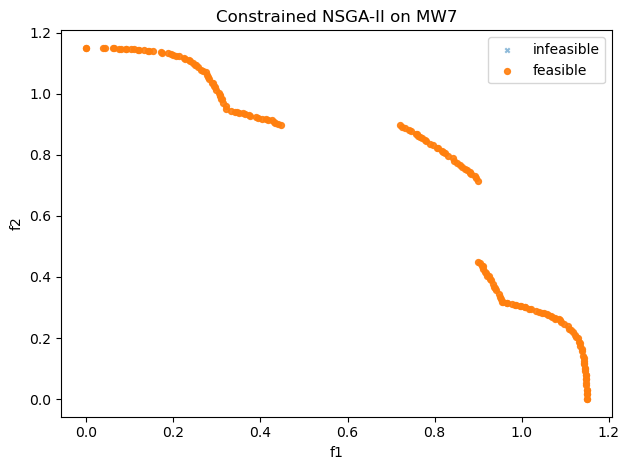

In [12]:
#-----------BEGIN-----------#
# TODO: 
#   1. Instantiate class CNSGA2() and class MW7()
#   2. Use NSGA-II with a contraint handling technique to solve the MW7 problem
#   3. Plot the final population `optimum_fx` in the objective space
#   4. In your report, answer the questions like: What are the possible reasons why the solutions 
#      obtained by NSGA-II fail to cover all segments of the Pareto front?
import matplotlib.pyplot as plt
import time

np.random.seed(42)
optimizer = CNSGA2(
    pop_size=180, pc=0.9, pm=None, eta_c=20, eta_m=20, seed=42,
    verbose=True, log_every=5, alert_patience=60
)
prob = MW7()

# 2) Solve MW7
t0 = time.time()
optimum_x, optimum_fx, optimum_cv = optimizer.run(prob, max_gen=300)
elapsed = time.time() - t0

# Summary
feasible_mask = (optimum_cv == 0)
num_feasible = int(np.sum(feasible_mask))
print(f"[Summary] Runtime: {elapsed:.2f}s | Feasible: {num_feasible}/{len(optimum_cv)} "
      f"({num_feasible/len(optimum_cv):.1%}) | Best CV: {float(np.min(optimum_cv)):.3e}")
if num_feasible > 0:
    feas_min = np.min(optimum_fx[feasible_mask], axis=0)
    print(f"[Summary] Feasible min objectives: [f1={feas_min[0]:.6g}, f2={feas_min[1]:.6g}]")

# 3) Plot final population (objective space)
plt.figure()
plt.scatter(optimum_fx[~feasible_mask, 0], optimum_fx[~feasible_mask, 1],
            s=10, alpha=0.5, label='infeasible', marker='x')
plt.scatter(optimum_fx[feasible_mask, 0], optimum_fx[feasible_mask, 1],
            s=18, alpha=0.9, label='feasible')
plt.xlabel('f1'); plt.ylabel('f2'); plt.title('Constrained NSGA-II on MW7')
plt.legend(); plt.tight_layout(); plt.show()

#-----------END-----------#

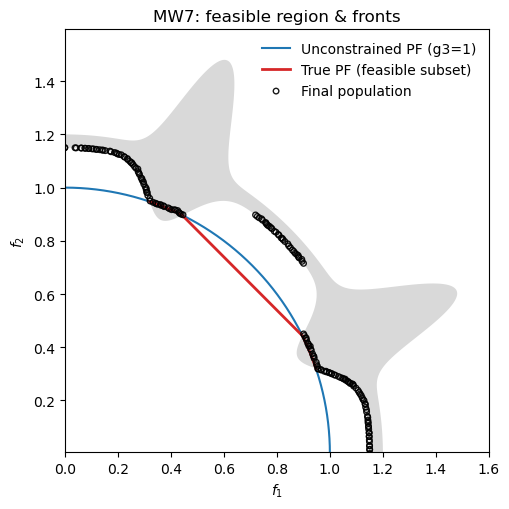

In [ ]:
# 可视化，之后删除
# ---- MW7 overlay plot: feasible region + unconstrained PF + true PF + final population ----
import numpy as np
import matplotlib.pyplot as plt

def plot_mw7_overlay(optimum_fx=None, show_population=True, xlim=(0, 1.6), ylim=(0, 1.6)):
    """
    Draw the MW7 objective-space overlay:
      - grey: feasible region (between inner/outer radius)
      - blue: unconstrained PF (g3 = 1) -> quarter unit circle
      - red:  true PF = feasible subset of the unconstrained PF
      - scatter: final population (optional)
    """
    # angle in [0, pi/2], avoid endpoints to prevent numerical artifacts
    L = np.linspace(1e-6, np.pi/2 - 1e-6, 2000)
    s4 = np.sin(4.0 * L)

    # outer/inner radii from constraints (r_out >= r >= r_in)
    r_out = 1.2 + 0.4 * (s4 ** 16)
    r_in  = 1.15 - 0.2 * (s4 ** 8)

    # Only keep angles where feasible band exists (r_in <= r_out)
    valid = r_in <= r_out

    # Build polygons (contiguous segments) to fill the feasible annulus-like region
    segs = []
    start = None
    for i, ok in enumerate(valid):
        if ok and start is None:
            start = i
        elif (not ok) and start is not None:
            segs.append(slice(start, i))
            start = None
    if start is not None:
        segs.append(slice(start, len(L)))

    plt.figure(figsize=(5.2, 5.2))

    # Fill each feasible segment with a polygon (outer boundary forward, inner backward)
    for sl in segs:
        lseg = L[sl]
        rout = r_out[sl]
        rin  = r_in[sl]
        x_poly = np.concatenate([rout * np.cos(lseg), (rin * np.cos(lseg))[::-1]])
        y_poly = np.concatenate([rout * np.sin(lseg), (rin * np.sin(lseg))[::-1]])
        plt.fill(x_poly, y_poly, color='0.85', edgecolor='none', alpha=1.0, zorder=1)

    # Unconstrained PF (g3 = 1) : quarter unit circle
    uc_x = np.cos(L)
    uc_y = np.sin(L)
    plt.plot(uc_x, uc_y, lw=1.5, color='C0', label='Unconstrained PF (g3=1)', zorder=2)

    # True PF: subset of the unit arc where r_in <= 1 <= r_out
    mask_pf = (r_in <= 1.0) & (1.0 <= r_out)
    plt.plot(uc_x[mask_pf], uc_y[mask_pf], lw=2.0, color='C3', label='True PF (feasible subset)', zorder=3)

    # Final population (optional)
    if show_population and (optimum_fx is not None):
        plt.scatter(optimum_fx[:, 0], optimum_fx[:, 1],
                    s=16, facecolors='none', edgecolors='k', alpha=0.9, label='Final population', zorder=4)

    plt.xlabel(r'$f_1$'); plt.ylabel(r'$f_2$')
    plt.axis('equal')
    plt.xlim(*xlim); plt.ylim(*ylim)
    plt.legend(frameon=False)
    plt.title('MW7: feasible region & fronts')
    plt.tight_layout()
    plt.show()

# Example usage (pass your final population)
plot_mw7_overlay(optimum_fx=optimum_fx, show_population=True)


### TODO: Use Constrained NSGA-II to Solve the Assigned Constrained Multi-objective Optimization Problem (30 marks)

You will be assigned one constrained multi-objective problem (refer to the provided [Google Sheet file](https://docs.google.com/spreadsheets/d/16YdUPUa9-odsxajJ2FukP3yenpzy3Wl2gUPET8h2TDo/edit?usp=sharing) that you are required to solve using the constrained NSGA-II algorithm. 

Your task is to **implement the problem class** and **apply the constrained NSGA-II algorithm** to solve the given problem. Additionally, you need to perform parameter analysis to determine the optimal parameter settings for the algorithm, and discuss how the algorithm's parameters affect its performance. 

Finally, you should present your best results and provide some discussion.

Kumar, A., Wu, G., Ali, M. Z., Luo, Q., Mallipeddi, R., Suganthan, P. N., & Das, S. (2021). A benchmark-suite of real-world constrained multi-objective optimization problems and some baseline results. Swarm and Evolutionary Computation, 67, 100961.

In [ ]:
#-----------BEGIN-----------#
# TODO:
#   1. Implement the problem class for the assigned RCMx real-world problem
#   2. Instantiate the CNSGA2() class and the problem class
#   3. Use the constrained NSGA-II algorithm to solve the problem with a range of parameter settings
#   4. Analyze the performance of the algorithm with different parameter settings, including the 
#      population size, crossover and mutation probabilities, and maximum number of generations
#   5. Plot the final population `optimum_fx` in the objective space  using the best 
#      parameter settings that you found in Step 4.
#-----------END-----------#

In [ ]:
import numpy as np

class RCM_HEX_3obj:
    """
    3-objective single heat-exchanger problem (TC, GWP, AP) based on Guillen-Gosalbez (2011).
    Decision vars: x = [m_cw (kg/s), t2 (K)].
    Constraints (violation >= 0):
      c0: t2 <= T2 - 10
      c1: t2 >  t1
      c2: |Q - m*Cpcw*(t2 - t1)| / Q   (energy balance equality as violation)
    """
    def __init__(self, use_objs=("TC","GWP","AP"), debug=False, eval_log_every=2000):
        self.name  = "RCM24-HEX (3obj variant)"
        self.n_obj = 3
        self.n_var = 2
        self.n_con = 3  # <-- now 3 constraints (added energy balance)
        # Bounds
        self.lower = np.array([0.01, 289.0])   # m_cw in [0.01, 5] kg/s; t2 just above t1
        self.upper = np.array([5.00, 324.9])   # ensure t2 <= T2-10 = 325 K (leave margin)

        # --- constants (from the paper’s table) ---
        self.cost_cw = 0.2          # $/m^3
        self.Cpcw    = 4.18         # kJ/kg/K   (m*Cpcw*ΔT is kJ/s = kW if m in kg/s)
        self.Q       = 142.5        # kW
        self.t1      = 288.0        # K
        self.T1      = 365.0        # K (hot in)
        self.T2      = 335.0        # K (hot out)
        self.U       = 0.8          # kW/m^2/K
        self.alpha   = 2829.25      # $   (capital-cost correlation)
        self.thick   = 2e-3         # m
        self.rho     = 8000.0       # kg/m^3
        self.t_op_h  = 60000.0      # hours

        # Environmental coefficients
        self.phi_cw_GWP = 8.0120e-4   # kg CO2-eq / kg water
        self.phi_cw_AP  = 3.6477e-6   # kg SO2-eq / kg water
        self.phi_st_GWP = 5.2536e+0   # kg CO2-eq / kg steel
        self.phi_st_AP  = 2.7067e-2   # kg SO2-eq / kg steel

        assert set(use_objs) <= {"TC","GWP","AP","TE"} and len(use_objs)==3
        self.use_objs = tuple(use_objs)

        # debug
        self.debug = debug
        self.eval_log_every = max(1, int(eval_log_every))
        self._eval_calls = 0

    @staticmethod
    def _lmtd(T1, t2, T2, t1):
        # Standard LMTD (more stable than Chen approx. for our ranges)
        d1 = (T1 - t2)
        d2 = (T2 - t1)
        eps = 1e-12
        ratio = np.maximum((d1 + eps) / (d2 + eps), eps)
        return (d1 - d2) / np.log(ratio)  # positive in our feasible ranges

    def evaluate(self, X):
        N = len(X)
        F = np.zeros((N, self.n_obj))
        C = np.zeros((N, self.n_con))

        m  = X[:, 0]               # kg/s
        t2 = X[:, 1]               # K

        LMTD = self._lmtd(self.T1, t2, self.T2, self.t1)       # K
        A = self.Q / (self.U * LMTD)                           # m^2

        # --- Operating & capital cost ---
        total_mass_cw = m * (self.t_op_h * 3600.0)             # kg
        total_vol_cw  = total_mass_cw / 1000.0                 # m^3
        TC = self.alpha * np.power(A, 0.65) + self.cost_cw * total_vol_cw

        # --- Environmental terms ---
        mass_steel = A * self.thick * self.rho                 # kg
        GWP = mass_steel * self.phi_st_GWP + total_mass_cw * self.phi_cw_GWP
        AP  = mass_steel * self.phi_st_AP  + total_mass_cw * self.phi_cw_AP

        obj_map = {"TC": TC, "GWP": GWP, "AP": AP}
        F[:, 0] = obj_map[self.use_objs[0]]
        F[:, 1] = obj_map[self.use_objs[1]]
        F[:, 2] = obj_map[self.use_objs[2]]

        # --- Constraints (violation >= 0) ---
        # c0: t2 <= T2 - 10
        C[:, 0] = np.maximum(t2 - (self.T2 - 10.0), 0.0)
        # c1: t2 > t1
        C[:, 1] = np.maximum((self.t1 + 1e-6) - t2, 0.0)
        # c2: energy balance equality scaled by Q
        energy_resid = np.abs(self.Q - m * self.Cpcw * (t2 - self.t1))  # kW
        C[:, 2] = energy_resid / max(self.Q, 1e-6)

        # --- light debug logs every K evals ---
        self._eval_calls += N
        if self.debug and (self._eval_calls % self.eval_log_every == 0):
            frac = [float(np.mean(C[:,k] > 0.0)) for k in range(self.n_con)]
            print(f"[RCM_HEX] eval_calls={self._eval_calls} | "
                  f"m in [{m.min():.3g},{m.max():.3g}] kg/s | "
                  f"t2 in [{t2.min():.3g},{t2.max():.3g}] K | "
                  f"viol c0={frac[0]:.1%}, c1={frac[1]:.1%}, c2={frac[2]:.1%}",
                  flush=True)

        return F, C



[grid] (1/3) start: {'pop_size': 120, 'pc': 0.9, 'pm': None, 'eta_c': 20, 'eta_m': 20, 'seed': 1}
[CNSGA2] Start | pop=120 | max_gen=120 | n_obj=3 | n_var=2 | log_every=10
[Gen    0/120] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=120  <== first feasible(s) found
[Gen   10/120] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=1 | dt=2.304s
[Gen   20/120] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=3 | dt=2.840s
[Gen   30/120] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=1 | dt=2.256s
[Gen   40/120] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=16 | dt=3.352s
[Gen   50/120] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=177 | dt=3.602s
[Gen   60/120] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=170 | dt=3.025s
[Gen   70/120] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=183 | dt=2.432s
[Gen   80/120] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=182 | dt=2.501s
[Gen   90/120] feasible=1

AxisError: axis 1 is out of bounds for array of dimension 1